# Training a model to identify plotted functions

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


The predictors are plots, the response is curves shown on the plots. We need to find the function y=f(x) in each case in a tabular format.

In [3]:
response_train = np.load('/content/gdrive/MyDrive/datasets/PlotRecognition/curves_train.npy')

In [4]:
predictors_train = np.load('/content/gdrive/MyDrive/datasets/PlotRecognition/plots_train.npy')

In [5]:
response_test = np.load('/content/gdrive/MyDrive/datasets/PlotRecognition/curves_test.npy')

In [6]:
predictors_test = np.load('/content/gdrive/MyDrive/datasets/PlotRecognition/plots_test.npy')

Checking whether the plots were loaded correctly:

In [7]:
predictors_train.shape

(10000, 216, 216)

In [8]:
dim_x = predictors_train.shape[1]
dim_y = predictors_train.shape[2]
print(dim_x, dim_y)

216 216


In [9]:
response_train.shape

(10000, 216)

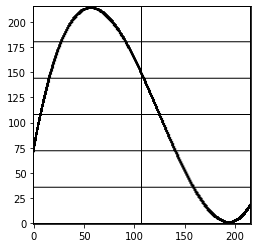

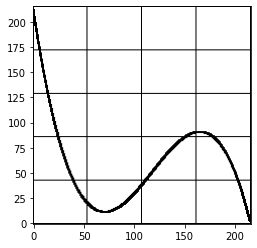

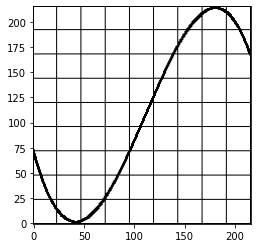

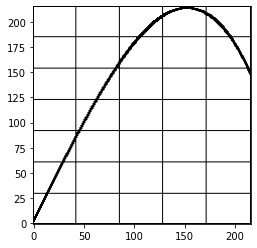

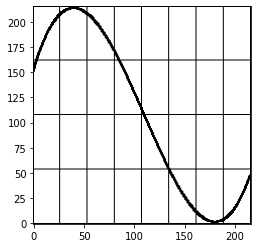

In [10]:
for n in range(5):
    plt.imshow(predictors_train[n, :, :], cmap='gray_r', vmin=0, vmax=1, origin='lower')
    plt.show()

## Model definition and training

In [11]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D(
            filters=32,
            kernel_size=(3, 3),
            activation='relu',
            input_shape=(dim_x, dim_y, 1)
        ),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(
            filters=64,
            kernel_size=(3, 3),
            activation='relu'
        ),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(
            filters=128,
            kernel_size=(3, 3),
            activation='relu'
        ),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(dim_x * 4, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(dim_x, activation='relu')
    ]
)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 214, 214, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 107, 107, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 105, 105, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 52, 52, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 128)      0

In [13]:
model.compile(loss='mean_squared_error',
              optimizer='adam')

In [14]:
history = model.fit(
    x=predictors_train,
    y=response_train,
    batch_size=None,
    epochs=30,
    validation_split=0.2,
)

Epoch 1/30
250/250 [==============================] - 29s 67ms/step - loss: 1402.5717 - val_loss: 88.5298
Epoch 2/30
250/250 [==============================] - 16s 65ms/step - loss: 147.8780 - val_loss: 67.1801
Epoch 3/30
250/250 [==============================] - 17s 66ms/step - loss: 101.7835 - val_loss: 18.2801
Epoch 4/30
250/250 [==============================] - 17s 66ms/step - loss: 79.1985 - val_loss: 29.4964
Epoch 5/30
250/250 [==============================] - 17s 67ms/step - loss: 65.9910 - val_loss: 16.1332
Epoch 6/30
250/250 [==============================] - 17s 66ms/step - loss: 60.8370 - val_loss: 12.3749
Epoch 7/30
250/250 [==============================] - 17s 66ms/step - loss: 55.6562 - val_loss: 10.5953
Epoch 8/30
250/250 [==============================] - 17s 66ms/step - loss: 49.4257 - val_loss: 10.1596
Epoch 9/30
250/250 [==============================] - 16s 66ms/step - loss: 47.0281 - val_loss: 16.7144
Epoch 10/30
250/250 [==============================] - 17s 6

In [15]:
historresponse_pd = pd.DataFrame(history.history)
historresponse_pd.columns

Index(['loss', 'val_loss'], dtype='object')

Training history. I left out the first value, as it was too large and the variations in the rest of the plot were not discernable.

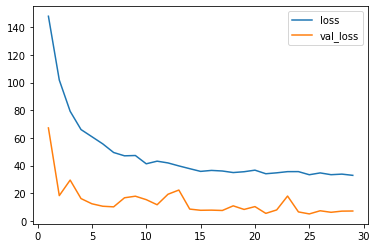

In [16]:
historresponse_pd.iloc[1:].plot.line()

## Results

Function to show an original plot overlaid with predicted curve.

In [17]:
def plot_result(plot_number, x, y):
    plt.imshow(x[plot_number, :, :], cmap='gray_r', vmin=0, vmax=1, origin='lower')
    plt.plot(list(range(0, dim_x)), y[plot_number, :], color='red')
    plt.show()

In [18]:
response_train_pred = model.predict(predictors_train)

### Training set

Some examples of plots overlaid with predicted curves (shown in red)

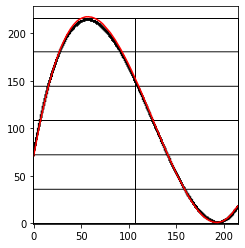

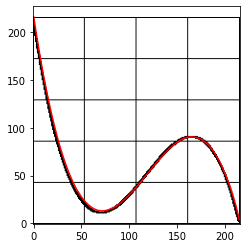

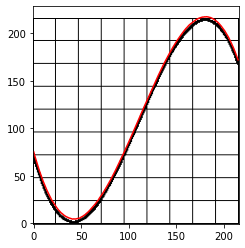

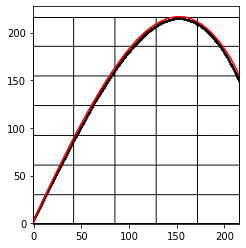

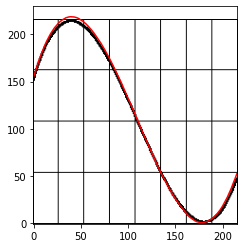

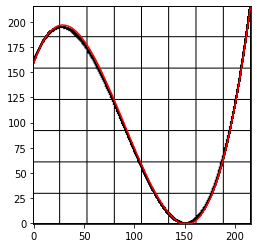

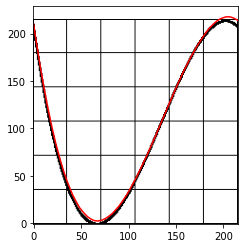

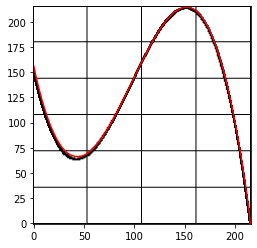

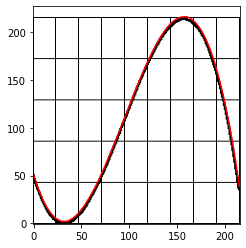

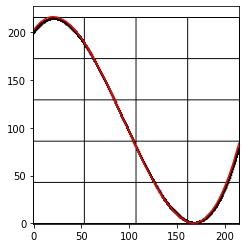

In [19]:
for i in range(10):
    plot_result(i, predictors_train, response_train_pred)

### Worst result in the training set

In [20]:
mse_train = np.mean(np.square(response_train_pred - response_train), 1)

Worst mse over the training set:

In [21]:
mse_train.max()

493.9488

Plot of the worst result:

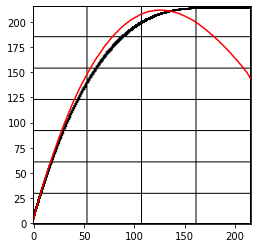

In [22]:
plot_result(np.argmax(mse_train), predictors_train, response_train_pred)

## Results on the test set

In [23]:
model.evaluate(predictors_test, response_test)
#print("Loss: ", loss)


63/63 [==============================] - 1s 21ms/step - loss: 7.1292


7.129245758056641

In [24]:
response_pred = model.predict(predictors_test)

Some examples of plots overlaid with predicted curves (shown in red)

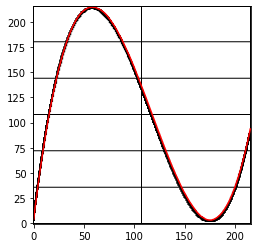

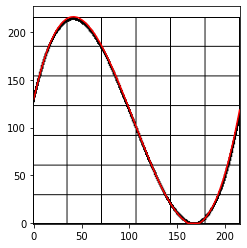

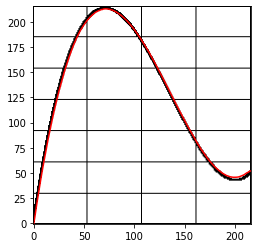

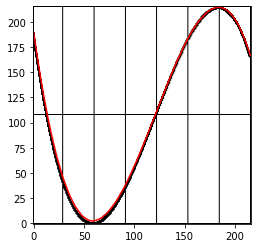

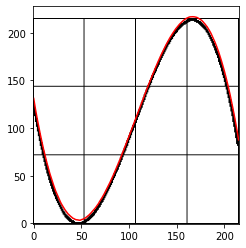

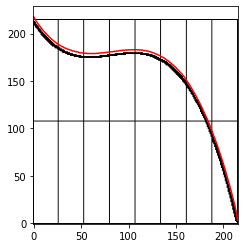

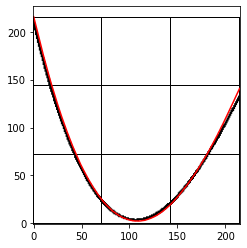

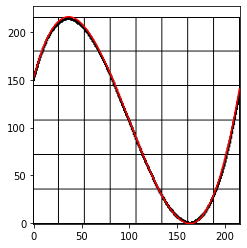

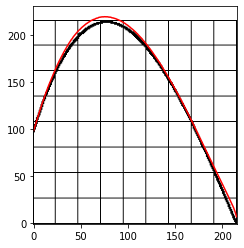

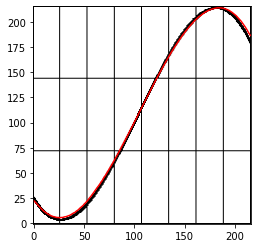

In [25]:
for i in range(10):
    plot_result(i, predictors_test, response_pred)

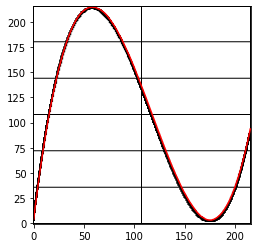

In [26]:
plot_result(0, predictors_test, response_pred)

### Worst result in the test set

In [27]:
mse_train = np.mean(np.square(response_pred - response_test), 1)

Worst mse value in the test set:

In [28]:
mse_train.max()

77.53985

Plot of the worst result:

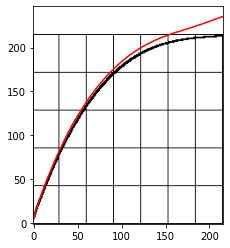

In [29]:
plot_result(np.argmax(mse_train), predictors_test, response_pred)

# Conclusion
MSE for the test set is only 7.1, which means a few pixels difference. Obviously, the worst case is where the curve merges into the grid.

In [30]:
model.save('/content/gdrive/MyDrive/datasets/PlotRecognition/model2')